In [1]:
# loading essential libraries for our sentiment analysis and preview the dataset
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

raw_data = "data.csv"

df = pd.read_csv(raw_data)

df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [2]:
# Here I'm checking the info about each clolumn to see if the data is clean and valid
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [3]:
# Check if there is any null values
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [4]:
# Checking if there are any duplicates
df.duplicated().sum()

np.int64(0)

In [5]:
# Show count of unique values
df.nunique()

Review    20491
Rating        5
dtype: int64

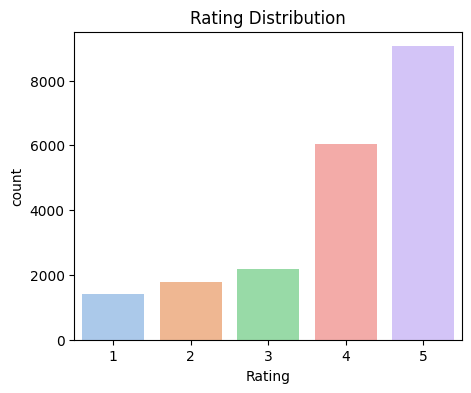

In [6]:
# Rating distribution
# This gives us a general idea of how our ratings look. From the bar chart, we can see that most restaurant ratings are positive.
# At the same time, there’s still a significant number of moderate and low ratings—it’s definitely worth digging into
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="Rating", hue="Rating", palette="pastel", legend=False)
plt.title("Rating Distribution")
plt.show()

In [7]:
# Since the whole point of this analysis is to figure out whether the review text is actually positive or negative, 
# and how that lines up with the rating I’m using NLTK’s built-in sentiment analyzer.
# It gives us a breakdown of each review’s tone: positive, neutral, and negative scores. 
# That way, we can see if what people say matches how they rate.
# But beyond that, this helps us understand how customers express themselves, even when their ratings don’t tell the full story. 
# Some people leave 5 stars but still mention problems, while others rate low but use polite or neutral language.

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def extract_vader_scores(text):
    scores = sia.polarity_scores(str(text))

    return pd.Series(
        {
            'Pos_score': scores['pos'],
            'Neu_score': scores['neu'],
            'Neg_score': scores['neg']
        }
    )

df[['Positive_score', 'Neutral_score', 'Negative_score']] = df['Review'].apply(extract_vader_scores)

df.head(50)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lukes\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review,Rating,Positive_score,Neutral_score,Negative_score
0,nice hotel expensive parking got good deal sta...,4,0.285,0.643,0.072
1,ok nothing special charge diamond member hilto...,2,0.189,0.701,0.110
2,nice rooms not 4* experience hotel monaco seat...,3,0.219,0.700,0.081
3,"unique, great stay, wonderful time hotel monac...",5,0.385,0.555,0.060
4,"great stay great stay, went seahawk game aweso...",5,0.221,0.643,0.135
5,love monaco staff husband stayed hotel crazy w...,5,0.265,0.651,0.084
6,"cozy stay rainy city, husband spent 7 nights m...",5,0.364,0.609,0.026
7,"excellent staff, housekeeping quality hotel ch...",4,0.228,0.740,0.032
8,"hotel stayed hotel monaco cruise, rooms genero...",5,0.298,0.663,0.038
9,excellent stayed hotel monaco past w/e delight...,5,0.484,0.451,0.064


In [8]:
# Here I’m labeling each review as either positive or negative. 1 means positive,  0 means negative.
# This gives us a simple way to classify the emotional tone of each review so we can compare it directly with the rating.
# It also sets us up for deeper analysis, like checking how often sentiment and rating actually match, 
# or training a model to predict sentiment from text.
def label_vader(text):
    score = sia.polarity_scores(str(text))['compound']
    return 1 if score > 0 else 0 

df['Sentiment'] = df['Review'].apply(label_vader)

df.head(50)

,Review,Rating,Positive_score,Neutral_score,Negative_score,Sentiment
0,nice hotel expensive parking got good deal sta...,4,0.285,0.643,0.072,1
1,ok nothing special charge diamond member hilto...,2,0.189,0.701,0.110,1
2,nice rooms not 4* experience hotel monaco seat...,3,0.219,0.700,0.081,1
3,"unique, great stay, wonderful time hotel monac...",5,0.385,0.555,0.060,1
4,"great stay great stay, went seahawk game aweso...",5,0.221,0.643,0.135,1
5,love monaco staff husband stayed hotel crazy w...,5,0.265,0.651,0.084,1
6,"cozy stay rainy city, husband spent 7 nights m...",5,0.364,0.609,0.026,1
7,"excellent staff, housekeeping quality hotel ch...",4,0.228,0.740,0.032,1
8,"hotel stayed hotel monaco cruise, rooms genero...",5,0.298,0.663,0.038,1
9,excellent stayed hotel monaco past w/e delight...,5,0.484,0.451,0.064,1


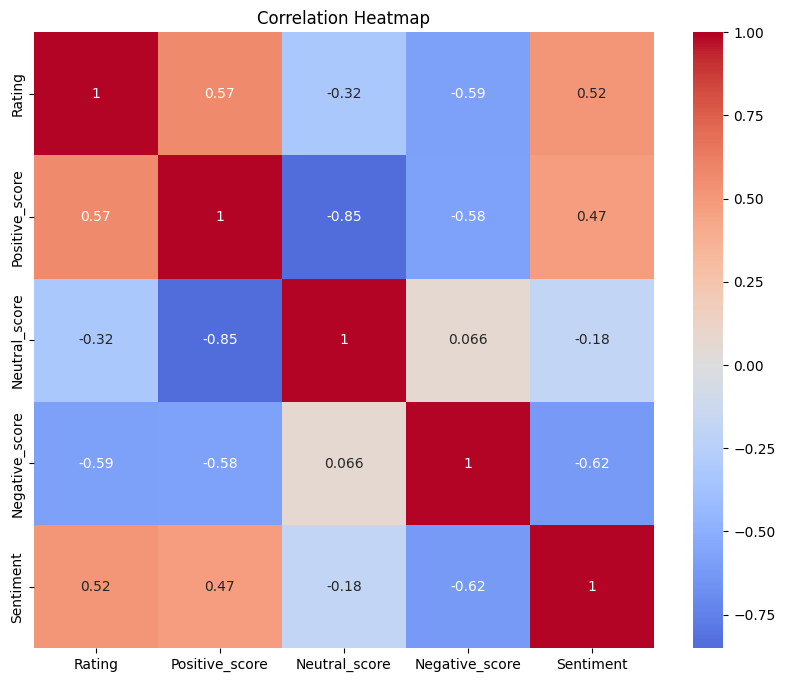

In [9]:
# This is a correlation heatmap showing how different numeric columns relate to each other.
# Red means a positive correlation, when one value goes up, the other tends to go up too.
# Blue means a negative correlation, when one value increases, the other tends to drop.
# From the heatmap, we can see a clear positive relationship between Positive_score and Rating, 
# which makes sense, more positive language usually means higher ratings.
# There’s also a strong negative correlation between Negative_score and Sentiment, which confirms that our sentiment labeling is working as expected.

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='Positive_score', ylabel='Count'>

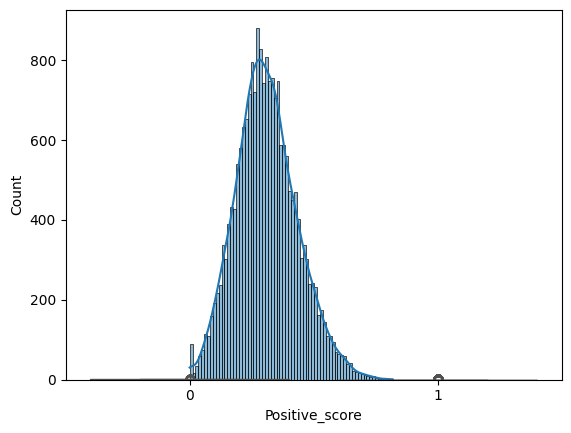

In [10]:
# This is a histogram showing how our Positive_score values are spread out.
# Most of the scores are clustered around the lower end like 0.2 to 0.4, which means the reviews tend to be mildly positive, not super enthusiastic.
# You can see the curve peaks there and then drops off toward both ends.
# There are a few outliers near 0 and 1, which could be reviews that are either super negative or overly positive, definitely worth checking out.
# Overall, this helps us understand the general tone of the reviews and gives us a feel for how strong the positive sentiment really is. 
# It’s a good sanity check before we start comparing these scores to the actual ratings.

sns.histplot(df['Positive_score'], kde=True)
sns.boxplot(x='Sentiment', y='Negative_score', data=df)

<Axes: xlabel='Rating', ylabel='Positive_score'>

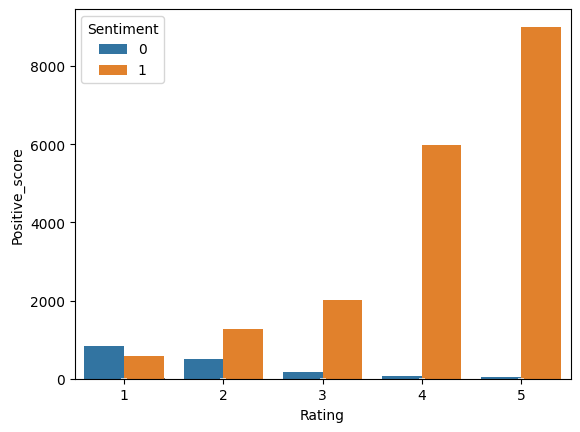

In [11]:
# Here I'm comparing the Positive_score with Sentiment and Rating using seaborns violinplot and countplot.
# This chart shows how Positive_score changes across different ratings, split by sentiment labels.
# You can see that for sentiment labeled as 1 (positive), the  goes up as the rating increases, which is exactly what we expect.
# For sentiment 0 (negative), the scores stay low and pretty flat across all ratings.
# This tells us that our sentiment labeling is working well, 
# and that there’s a strong connection between how people rate and how they express themselves in the review.
# It also helps confirm that our sentiment scores aren’t random, they’re actually picking up on meaningful patterns in the text.

sns.violinplot(x='Rating', y='Positive_score', data=df)
sns.countplot(x='Rating', hue='Sentiment', data=df)

<Axes: xlabel='Positive_score', ylabel='Rating'>

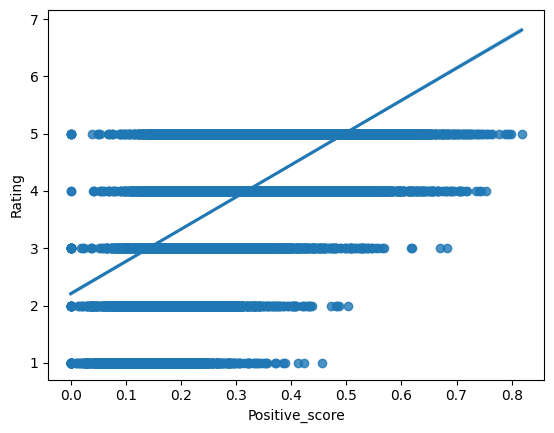

In [12]:
# This scatter plot shows how  relates to , and the regression line makes it clear—there’s a solid upward trend.
# Basically, the more positive the review text is, the higher the rating tends to be. 
# That’s exactly what we want to see—it means our sentiment scores are actually capturing something real.
# There are a few points that sit a little off the line, which could be interesting edge cases 
# like someone writing a super positive review but still giving a low rating. Might be worth digging into those later.

sns.regplot(x='Positive_score', y='Rating', data=df)

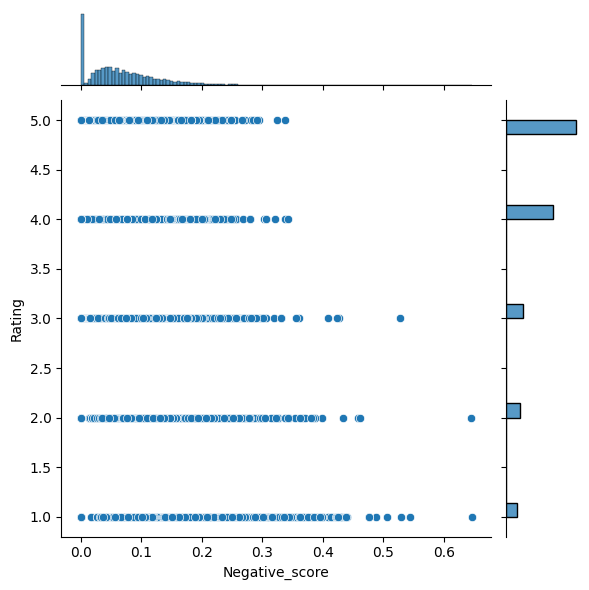

In [13]:
# This final plot ties everything together. It shows that when the negative sentiment in a review goes up, 
# the rating usually drops—which is exactly what we’d expect. Most reviews are low in negativity, 
# and ratings tend to be either really high or really low. That confirms our sentiment scores are picking up on real emotion, 
# and the whole pipeline makes sense.

sns.jointplot(x='Negative_score', y='Rating', data=df, kind='scatter')

In [14]:
# From this sentiment analysis, we learned that customer ratings strongly align with the emotional tone of their reviews. 
# Positive language tends to show up in high ratings, and negative sentiment tracks with low ones. 
# That means our sentiment scoring is reliable, and we can use it to flag issues, understand customer mood, 
# and make smarter decisions based on how people actually feel—not just what they score.

In [15]:
# This part is for later use. I’m splitting, stemming, and tokenizing the words to prep them for future modeling. 
# The idea is to combine these processed words with sentiment scores so I can train my own AI model and use it for future sentiment analysis projects.

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())

    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


df['Cleaned'] = df['Review'].apply(preprocess)

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lukes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Rating,Positive_score,Neutral_score,Negative_score,Sentiment,Cleaned
0,nice hotel expensive parking got good deal sta...,4,0.285,0.643,0.072,1,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,2,0.189,0.701,0.110,1,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,3,0.219,0.700,0.081,1,nice room 4 experi hotel monaco seattl good ho...
3,"unique, great stay, wonderful time hotel monac...",5,0.385,0.555,0.060,1,uniqu great stay wonder time hotel monaco loca...
4,"great stay great stay, went seahawk game aweso...",5,0.221,0.643,0.135,1,great stay great stay went seahawk game awesom...


In [16]:
# Export the final dataset in csv format
df.to_csv("final_dataset.csv", index=False)